# Salary Project
Problem Statement:


Predict the salary if the employee using the features provided in the data. 



In [119]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import warnings
warnings.filterwarnings("ignore")

In [64]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv")
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [65]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [66]:
df.tail()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329
396,AsstProf,A,8,4,Male,81035


In [67]:
df.sample()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
71,Prof,B,45,45,Male,146856


In [68]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [69]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [70]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [71]:
print(df['rank'].unique())
print(df['discipline'].unique())
print(df['sex'].unique())

['Prof' 'AsstProf' 'AssocProf']
['B' 'A']
['Male' 'Female']


In [72]:
#rank, discipline and sex is categorical data into numerical value 
def feature_engineering(df):
    df['sex']= np.where(df['sex']=='Male',1,0) ##Converting male=1 and female =0
   
    
    label_enco_rank ={value : key for key, value in enumerate(df['rank'].unique())}
    df['rank']=df['rank'].map(label_enco_rank) #prof=0, AsstProf=1 and AssocProf=2
    
    df['discipline']=np.where(df['discipline']=='A',1,0) #Discipline A=1 and B=0
    
    return df

In [73]:
df=feature_engineering(df)

In [74]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,0,0,19,18,1,139750
1,0,0,20,16,1,173200
2,1,0,4,3,1,79750
3,0,0,45,39,1,115000
4,0,0,40,41,1,141500


In [75]:
#now since all the values are numerical we will check correlation and skewness
#correlation 

df.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,-0.525500,-0.447499,-0.132492,-0.522207
discipline,-0.086266,1.000000,0.218087,0.164599,-0.003724,-0.156084
yrs.since.phd,-0.525500,0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,-0.447499,0.164599,0.909649,1.000000,0.153740,0.334745
sex,-0.132492,-0.003724,0.148788,0.153740,1.000000,0.138610
salary,-0.522207,-0.156084,0.419231,0.334745,0.138610,1.000000


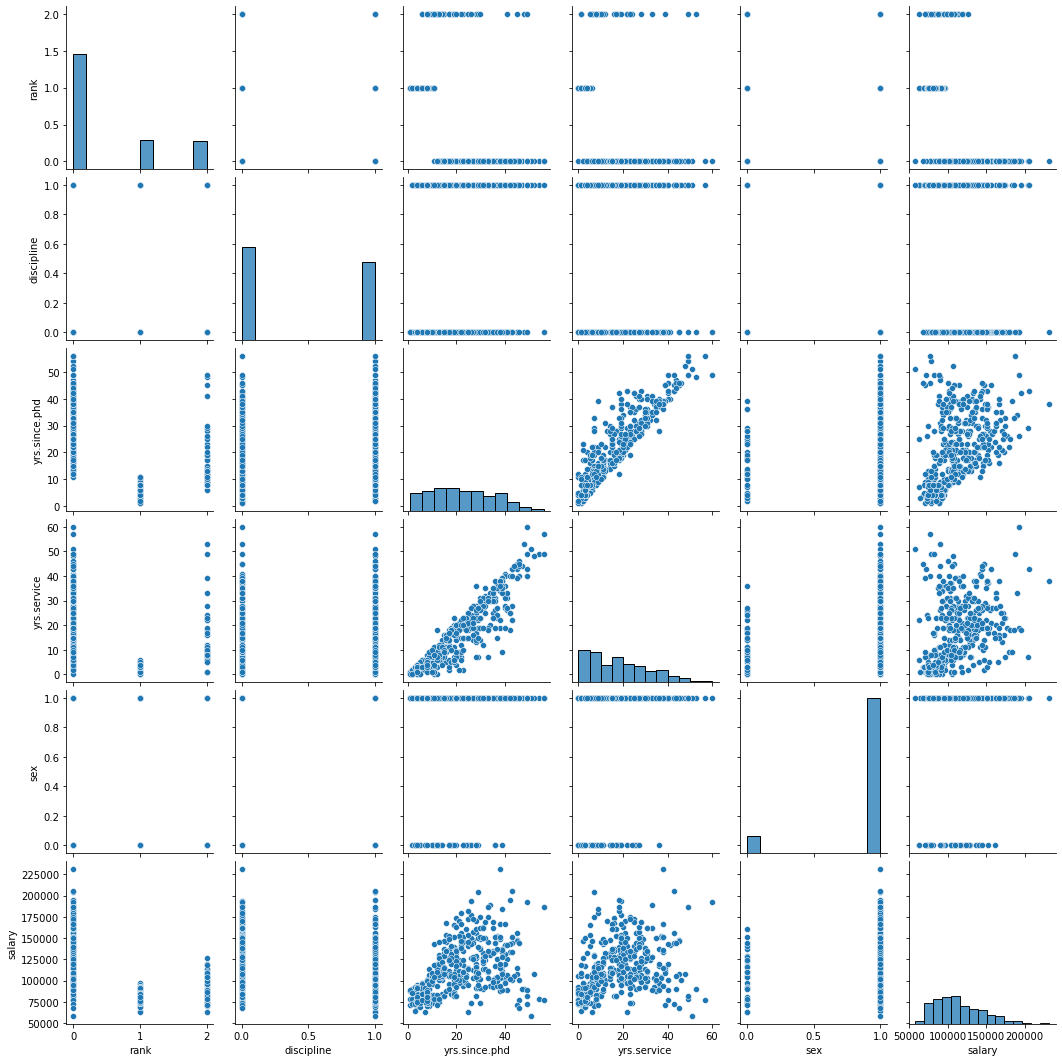

In [76]:
sns.pairplot(df)
plt.savefig('pairplot_salary.png')
plt.show()

In [77]:
#skewness 
df.skew()

rank             1.151164
discipline       0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

In [78]:
#dividing data into dependent and independent variable 
x = df.drop("salary", axis = 1)
y = df["salary"]

#check skewness
x.skew()

rank             1.151164
discipline       0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
dtype: float64

<AxesSubplot:xlabel='sex', ylabel='salary'>

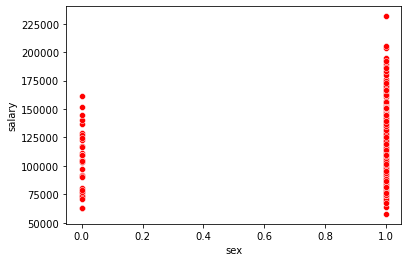

In [79]:
sns.scatterplot(x='sex',y='salary',data=df,color='r')

sex has highest skewness and also this factor does not affect salary so we will drop this column

In [80]:
df_new=df.drop(['sex'], axis=1)

In [81]:
df_new.skew()

rank             1.151164
discipline       0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

In [82]:
#dividing data into dependent and independent variable 
x = df_new.drop("salary", axis = 1)
y = df_new["salary"]

#check skewness
x.skew()

rank             1.151164
discipline       0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
dtype: float64

In [85]:
df_new.head()

,rank,discipline,yrs.since.phd,yrs.service,salary
0,0,0,19,18,139750
1,0,0,20,16,173200
2,1,0,4,3,79750
3,0,0,45,39,115000
4,0,0,40,41,141500


In [86]:
df_new.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'salary'], dtype='object')

<AxesSubplot:xlabel='rank'>

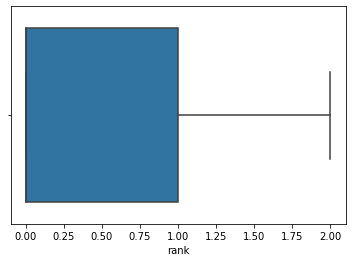

In [87]:
sns.boxplot(df_new['rank'])

<AxesSubplot:xlabel='discipline'>

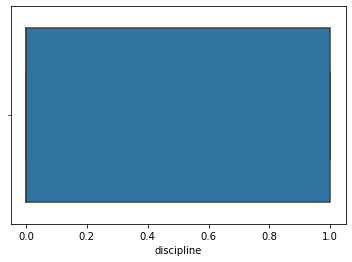

In [88]:
sns.boxplot(df_new['discipline'])

<AxesSubplot:xlabel='yrs.since.phd'>

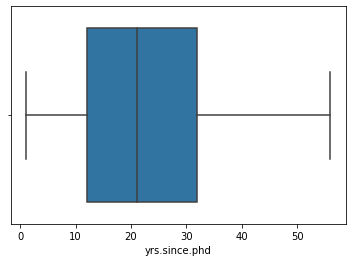

In [89]:
sns.boxplot(df_new['yrs.since.phd'])

<AxesSubplot:xlabel='yrs.service'>

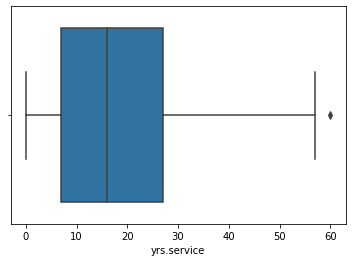

In [90]:
bb

<b>Removing outlier using IQR <b>

In [98]:
def remove_outlier_yrs_service(df):
    IQR =df['yrs.service'].quantile(0.75)-df['yrs.service'].quantile(0.25)
    
    lower_range=df['yrs.service'].quantile(0.25) - (1.5*IQR)
    upper_range=df['yrs.service'].quantile(0.75) + (1.5*IQR)
    
    df.loc[df['yrs.service']<= lower_range, 'yrs.service']=lower_range
    df.loc[df['yrs.service']>= upper_range, 'yrs.service']=upper_range

In [99]:
remove_outlier_yrs_service(df_new)

<AxesSubplot:xlabel='yrs.service'>

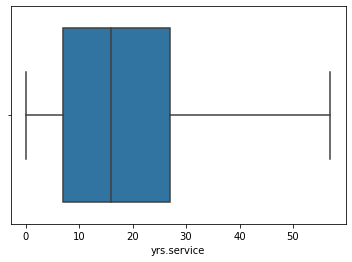

In [100]:
sns.boxplot(df_new['yrs.service'])

As per Above ploting now there is no outlier for yrs.service

<AxesSubplot:xlabel='salary'>

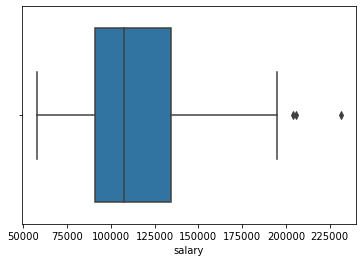

In [104]:
sns.boxplot(df_new['salary'])

For column salary there is outlier but salary is targeted column for we are ignoring

In [105]:
# removing  skewness 
#importing necessary library
from sklearn.preprocessing import power_transform

#intialize
df2 = power_transform(x)

#create the new dataframe
df2 = pd.DataFrame(df_new, columns = x.columns)

#check skewness
df2.skew()

rank             1.151164
discipline       0.177684
yrs.since.phd    0.300880
yrs.service      0.638456
dtype: float64

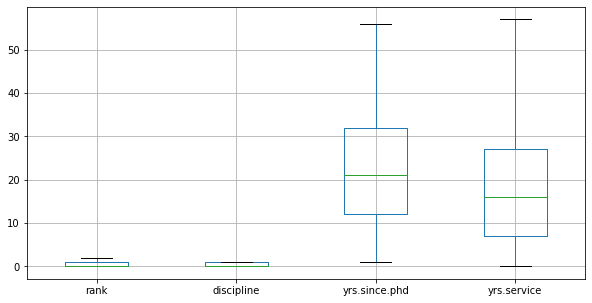

In [106]:
#Checking Outliers 
#making boxplots 
# plotin box plot for the attribute

x = df2
x.boxplot(figsize = [10,5])
plt.show()

In [107]:
df_new

,rank,discipline,yrs.since.phd,yrs.service,salary
0,0,0,19,18,139750
1,0,0,20,16,173200
2,1,0,4,3,79750
3,0,0,45,39,115000
4,0,0,40,41,141500
...,...,...,...,...,...
392,0,1,33,30,103106
393,0,1,31,19,150564
394,0,1,42,25,101738
395,0,1,25,15,95329


In [108]:
# Data Processing

X=df_new.iloc[: , : -1].values
Y=df_new.iloc[: , -1].values

In [109]:
X

array([[ 0,  0, 19, 18],
       [ 0,  0, 20, 16],
       [ 1,  0,  4,  3],
       ...,
       [ 0,  1, 42, 25],
       [ 0,  1, 25, 15],
       [ 1,  1,  8,  4]], dtype=int64)

In [110]:
Y

array([139750, 173200,  79750, 115000, 141500,  97000, 175000, 147765,
       119250, 129000, 119800,  79800,  77700,  78000, 104800, 117150,
       101000, 103450, 124750, 137000,  89565, 102580,  93904, 113068,
        74830, 106294, 134885,  82379,  77000, 118223, 132261,  79916,
       117256,  80225,  80225,  77000, 155750,  86373, 125196, 100938,
       146500,  93418, 101299, 231545,  94384, 114778,  98193, 151768,
       140096,  70768, 126621, 108875,  74692, 106639, 103760,  83900,
       117704,  90215, 100135,  75044,  90304,  75243, 109785, 103613,
        68404, 100522, 101000,  99418, 111512,  91412, 126320, 146856,
       100131,  92391, 113398,  73266, 150480, 193000,  86100,  84240,
       150743, 135585, 144640,  88825, 122960, 132825, 152708,  88400,
       172272, 107008,  97032, 105128, 105631, 166024, 123683,  84000,
        95611, 129676, 102235, 106689, 133217, 126933, 153303, 127512,
        83850, 113543,  82099,  82600,  81500, 131205, 112429,  82100,
      

In [111]:
X.shape

(397, 4)

In [112]:
Y.shape

(397,)

LINEAR REGRESSION

In [123]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=35)
LR = LinearRegression()
LR.fit(X_train, Y_train)
pred = LR.predict(X_test)

print(r2_score(Y_test, pred))
print("Mean absolute error: ", mean_absolute_error(Y_test,pred))
print("Mean squared error: ", mean_squared_error(Y_test,pred))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, pred)))

0.3214501019116729
Mean absolute error:  19887.07476174016
Mean squared error:  660981275.4251521
RMSE:  25709.55611100962


In [124]:
from sklearn.model_selection import cross_val_score
LR_CV = cross_val_score(LR,X,Y,cv=5)
LR_CV = LR_CV.mean()
print('C V Score:', LR_CV*100)

C V Score: 29.61506929722303


LASSO REGRESSION

In [115]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import Lasso
parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
LS= Lasso()
LS.fit(X_train,Y_train)
pred1 = LS.predict(X_test)
print(r2_score(Y_test, pred1))
print('Mean absolute error: ',mean_absolute_error(Y_test,pred1))
print('Mean squared error: ',mean_squared_error(Y_test,pred1))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(Y_test,pred1)))

0.3214569217079366
Mean absolute error:  19886.77683759375
Mean squared error:  660974632.2031204
Root Mean squared error:  25709.42691316009


In [116]:
from sklearn.model_selection import cross_val_score
LS_CV = cross_val_score(LS,X,Y,cv=5)
LS_CV = LS_CV.mean()
print('C V Score:', LS_CV*100)

C V Score: 29.61573545100229


RIDGE REGRESSOR

In [117]:
from sklearn.linear_model import Ridge
parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
RR= Ridge()
RR = Ridge(alpha=0.0001,random_state=0)
RR.fit(X_train,Y_train)
pred2 = RR.predict(X_test)
print(r2_score(Y_test, pred2))
print('Mean absolute error: ',mean_absolute_error(Y_test,pred2))
print('Mean squared error: ',mean_squared_error(Y_test,pred2))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(Y_test,pred2)))

0.32145012434507625
Mean absolute error:  19887.073041412867
Mean squared error:  660981253.5725814
Root Mean squared error:  25709.55568602035


In [118]:
from sklearn.model_selection import cross_val_score
RR_CV = cross_val_score(RR,X,Y,cv=5)
RR_CV = RR_CV.mean()
print('C V Score:', RR_CV*100)

C V Score: 29.615072396643487


According to above LASSO REGRESSION is best model

In [140]:
actual_vs_pred = pd.DataFrame({'Actual': Y_test, 'Predicted': pred1})
actual_vs_pred

,Actual,Predicted
0,103450,116883.617835
1,107309,117239.335706
2,83600,110372.804844
3,127512,129156.093063
4,172505,112970.721256
...,...,...
154,96545,143976.914902
155,139750,123236.873665
156,95329,118935.487346
157,105260,115022.590766
